# Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset("tips")

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


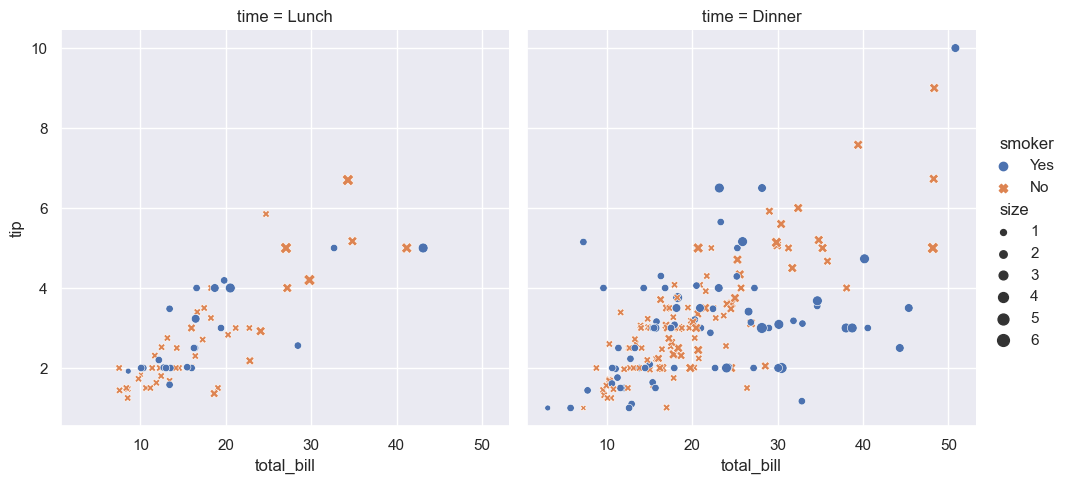

In [5]:
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

### A high-level API for statistical graphics


In [17]:
dots = sns.load_dataset("dots")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


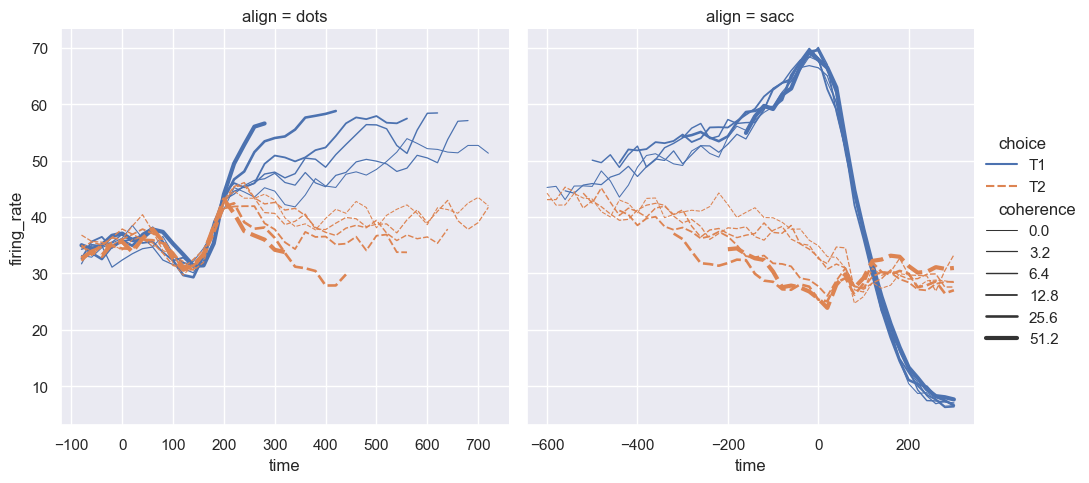

In [18]:

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)



###### description of attributes of ` relplot() `
- `data`: This attribute specifies the DataFrame or long-form data object that contains the data to be plotted.

- `kind`: This attribute determines the type of plot to be created. In the example, it is set to "line" to create a line plot.

- `x` and `y`: These attributes specify the column names or keys in the data to be used as the x and y variables in the plot. In the example, "time" is used as the x-axis variable, and "firing_rate" is used as the y-axis variable.

- `col`: This attribute allows for creating separate plots based on unique values in a column. In the example, the plot is divided into separate columns based on unique values in the "align" column.

- `hue`: This attribute assigns different colors to the points or lines in the plot based on unique values in a column. In the example, the "choice" column is used to assign different colors to the lines.

- `size`: This attribute determines the size of the markers or lines in the plot based on the values in a column. In the example, the "coherence" column is used to specify the size of the markers or lines.

- `style`: This attribute sets the style of the markers or lines based on the values in a column. In the example, the "choice" column is used to determine the style.

- `facet_kws`: This attribute provides additional keyword arguments for controlling the appearance of the subplots created by the `col` attribute. In the example, `sharex=False` is used to disable sharing the x-axis across the subplots.



### Statistical estimation

Many seaborn functions will automatically perform the statistical estimation 

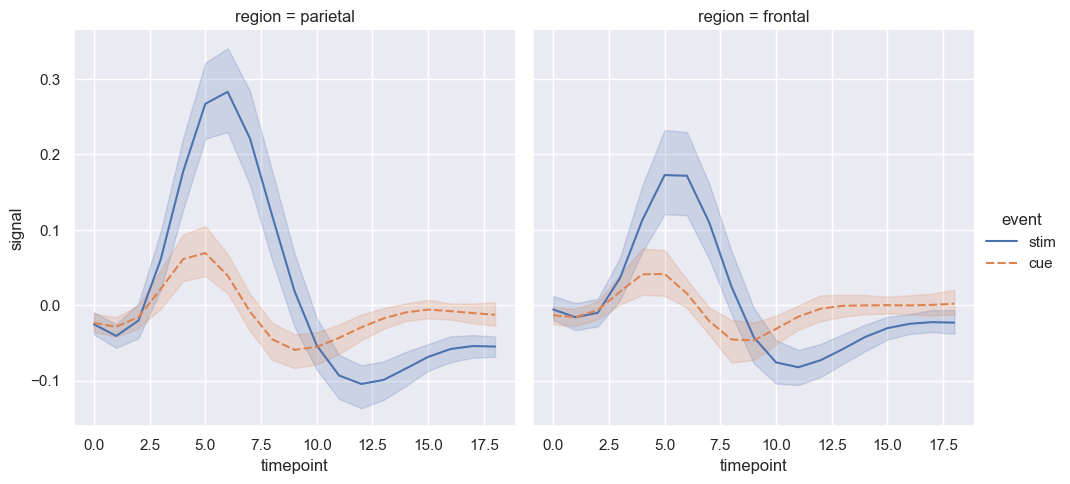

In [19]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

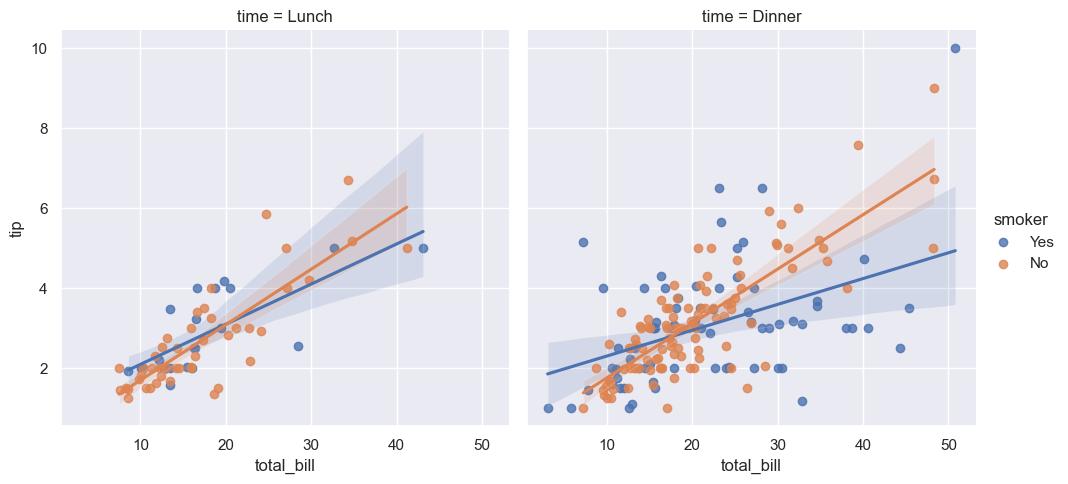

In [22]:
tips=sns.load_dataset("tips")
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through `catplot()`

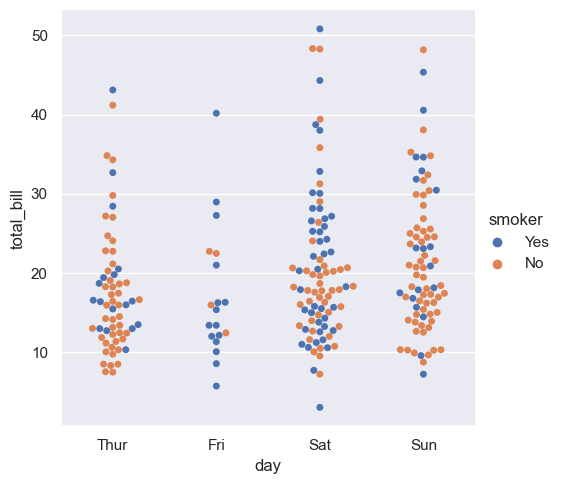

In [23]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

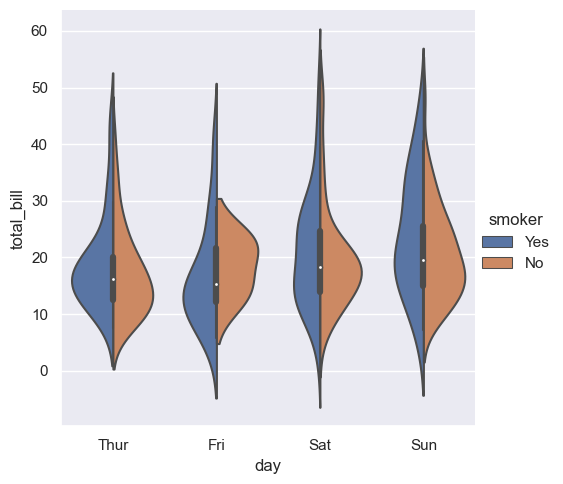

In [24]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

### Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. 
One, `jointplot()`, focuses on a single relationship. 
It plots the `joint distribution` between two variables along with `each variable’s marginal distribution`

In [25]:
penguins = sns.load_dataset("penguins")

In [27]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


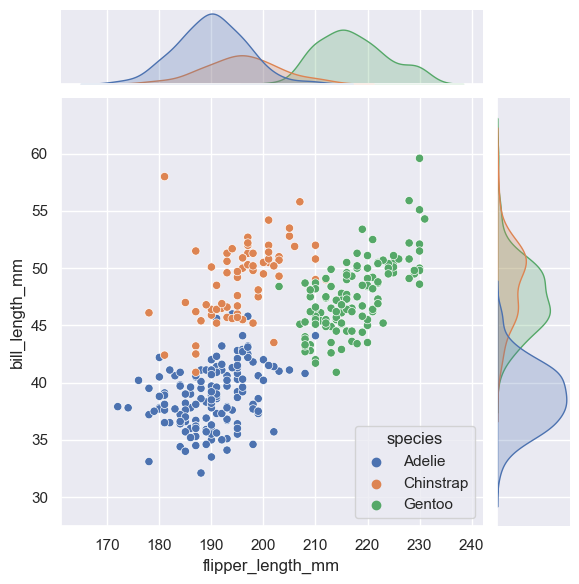

In [28]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, `pairplot()`, takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively

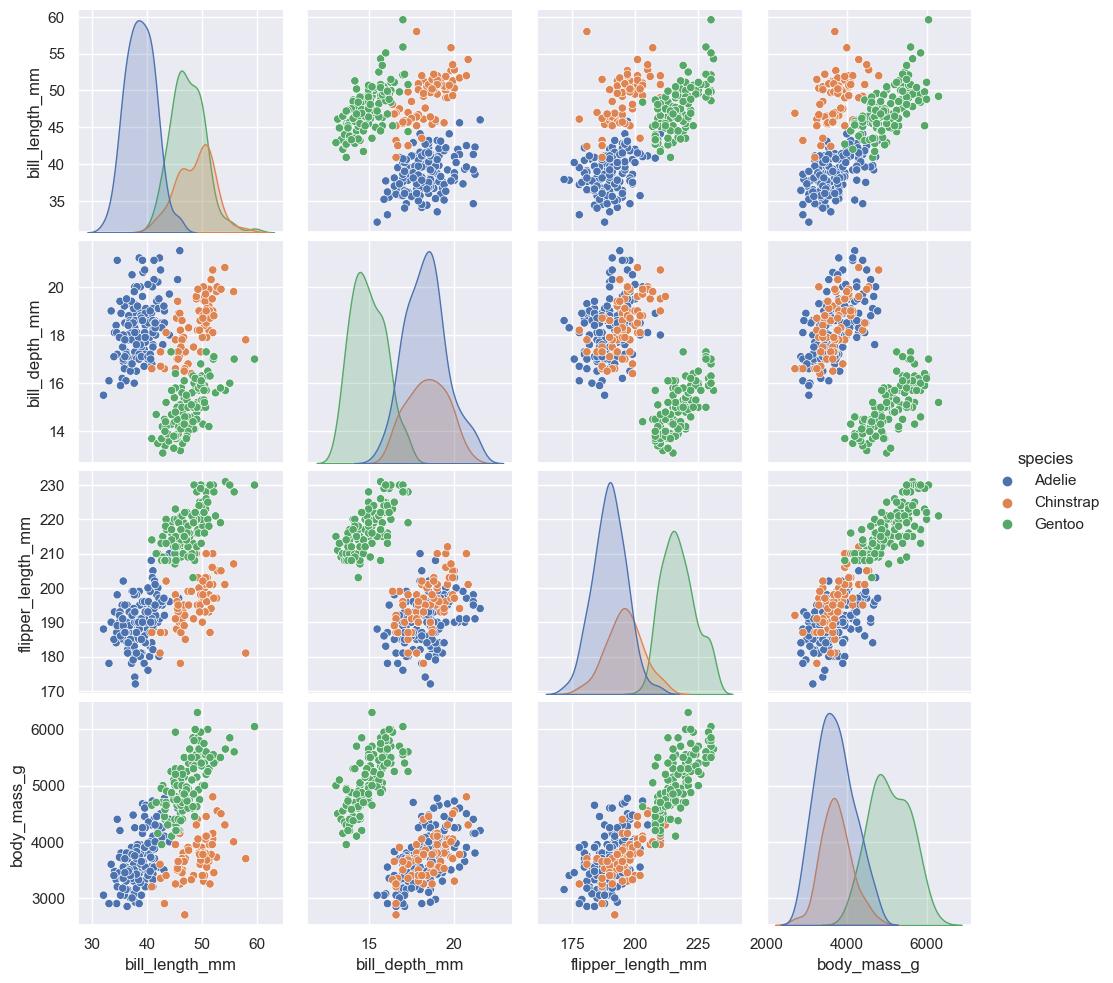

In [29]:
sns.pairplot(data=penguins, hue="species")

### Opinionated defaults and flexible customization


Seaborn creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot

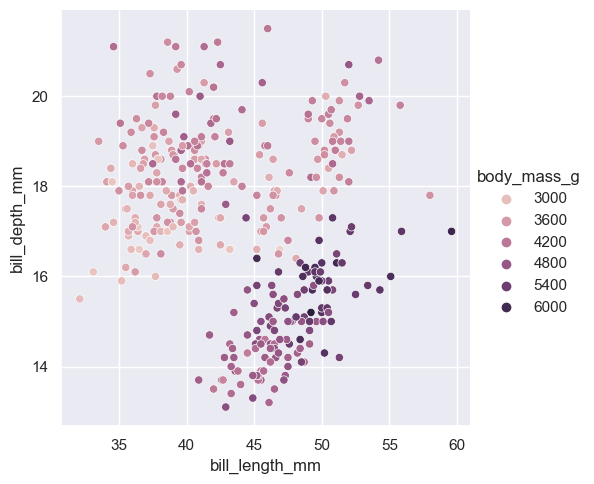

In [30]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

Once you’ve created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking

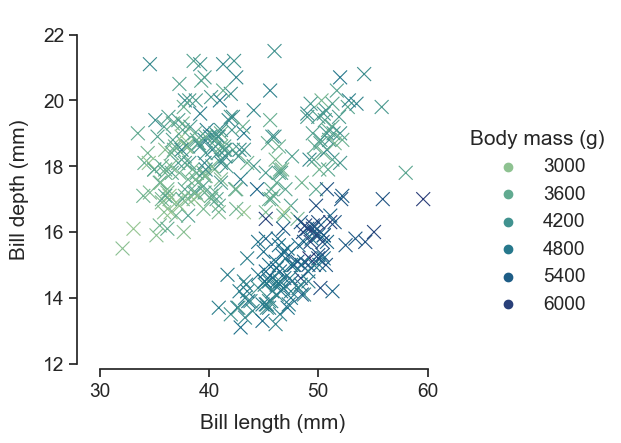

In [31]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

# Visualizing distributions of data

The distributions module contains several functions designed to answer questions such as these. 

The axes-level functions are `histplot()`, `kdeplot()`, `ecdfplot()`, and `rugplot()`.

They are grouped together within the figure-level `displot()`, `jointplot()`, and `pairplot()` functions.

### Plotting univariate histograms
Perhaps the most common approach to visualizing a distribution is the histogram. This is the default approach in displot(), which uses the same underlying code as histplot()

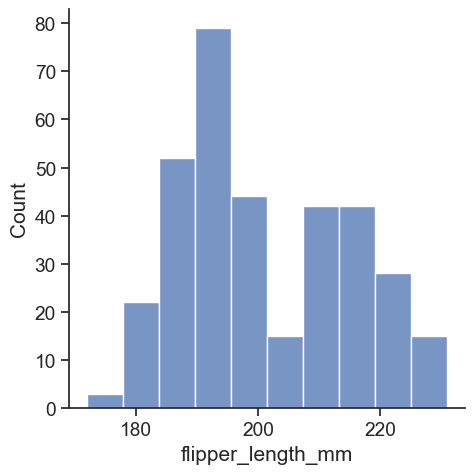

In [32]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

Here is a comprehensive list of attributes available in the `sns.displot()` function in Seaborn:

- `data`: DataFrame or long-form data object.
- `x` or `y`: Column name or key for the variable to be plotted.
- `hue`: Grouping variable that will produce elements with different colors.
- `multiple`: How to handle multiple observations at the same x or y level. Options are "layer" (default), "stack", or "dodge".
- `col` or `row`: Variables that define subsets of the data, which will be drawn on separate facets.
- `col_wrap`: Maximum number of column facets to be displayed.
- `kind`: Type of distribution plot to be created. Options are "hist" (default), "kde", or "ecdf".
- `rug`: Whether to draw a rug plot (small tick marks) along the axis to indicate individual observations. Boolean value (`True` or `False`).
- `height`: Height (in inches) of each facet. Numeric value.
- `aspect`: Aspect ratio of each facet, expressed as the ratio of width to height. Numeric value.
- `bw`: Bandwidth parameter for the KDE plot. Numeric value or string specifying a method for bandwidth estimation (e.g., "scott", "silverman").
- `common_norm`: Whether to make sure the distributions are normalized when multiple distributions are plotted. Boolean value.
- `common_bins`: Whether to use the same number of bins across multiple distributions. Boolean value.
- `discrete`: Whether to treat the variable as discrete, which affects the handling of the KDE plot. Boolean value.
- `line_kws`: Additional keyword arguments to customize the line(s) in the KDE plot.
- `fill`: Whether to fill the area under the KDE curve. Boolean value.
- `palette`: Color palette to use for the hue variable.
- `legend`: Whether to show a legend for the hue variable. Boolean value.
- `log_scale`: Whether to apply a logarithmic scale to the axis. Boolean value.
- `cumulative`: Whether to plot the cumulative distribution function (CDF) instead of the probability density function (PDF). Boolean value.
- `element`: The visual element to use for representing the distribution. Options are "bars" (default) or "step".
- `stat`: The method used to compute the histogram bars. Options are "count" (default), "frequency", "density", or "probability".
- `bins`: Number of bins to use in the histogram. Integer value or string specifying a method for determining the number of bins (e.g., "auto", "fd", "doane").
- `kde`: Whether to include a kernel density estimate (KDE) plot. Boolean value.
- `kde_kws`: Additional keyword arguments to customize the KDE plot.
- `color`: Color to use for the plot elements. String or RGB tuple.
- `ax`: Matplotlib Axes object to draw the plot onto.
- `**kwargs`: Additional keyword arguments to be passed to the underlying plotting function.



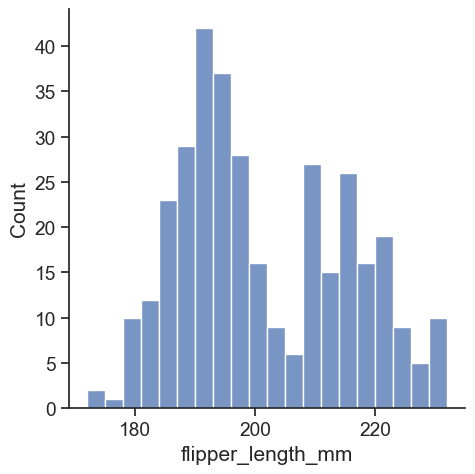

In [38]:
# Choosing the bin sizea
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

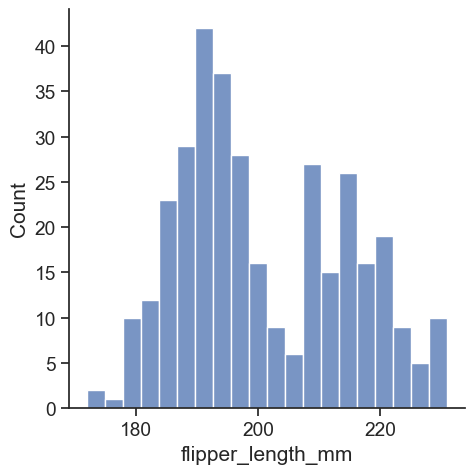

In [34]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

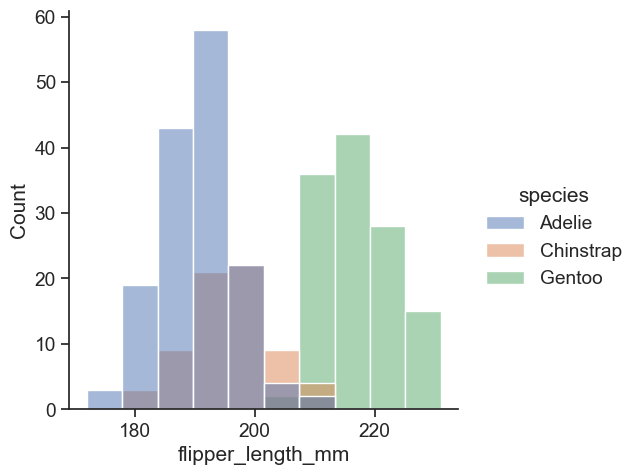

In [35]:
# Conditioning on other variables
sns.displot(penguins, x="flipper_length_mm", hue="species")

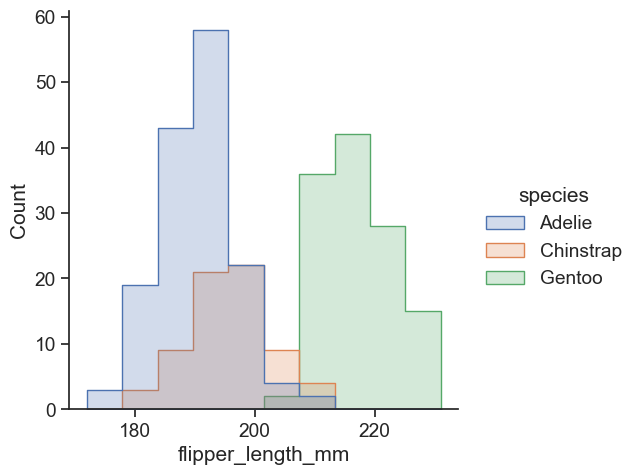

In [36]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

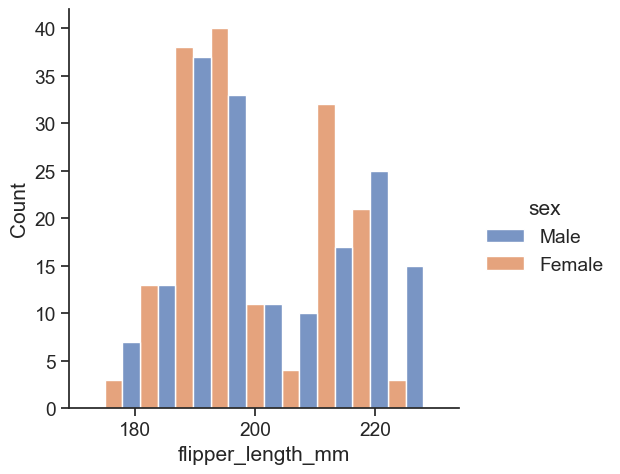

In [37]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

### Normalized histogram statistics

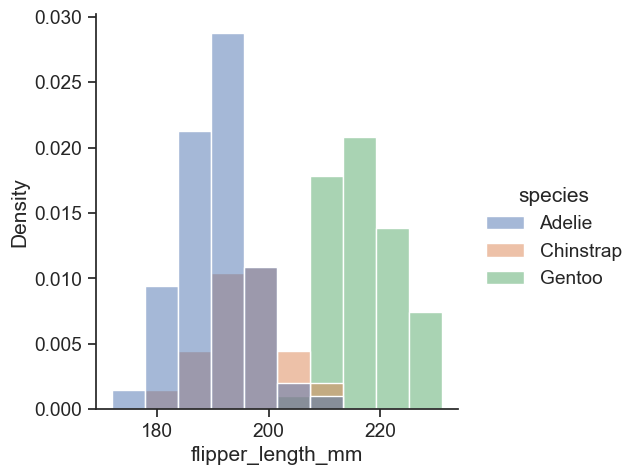

In [39]:
# normalize the counts using the stat parameter
# stat: The method used to compute the histogram bars. Options are "count" (default), "frequency", "density", or "probability".
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

## Kernel density estimation
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. 
- a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.
- A `Gaussian kernel` , also known as a Gaussian filter or Gaussian smoothing kernel, is a mathematical function that is commonly used in image processing and signal processing for smoothing or blurring operations. 
`K(x, y) = (1 / (2 * π * σ^2)) * exp(-(x^2 + y^2) / (2 * σ^2))`


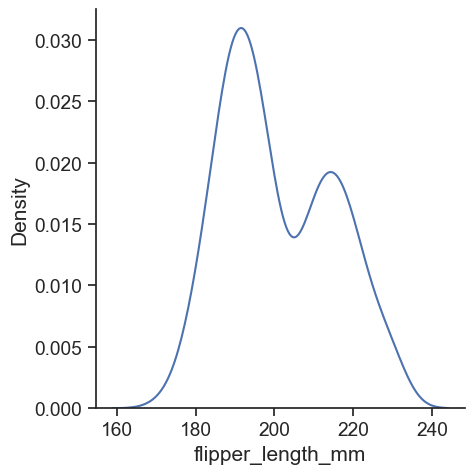

In [40]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

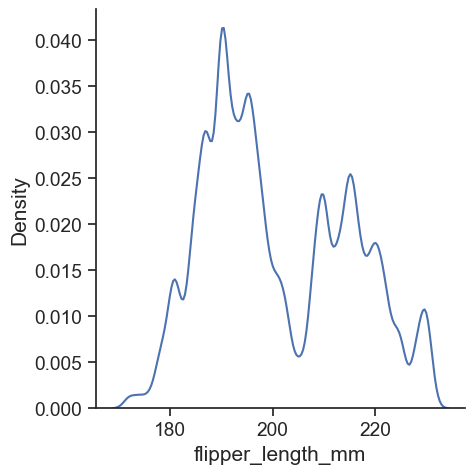

In [41]:
# Choosing the smoothing bandwidth
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

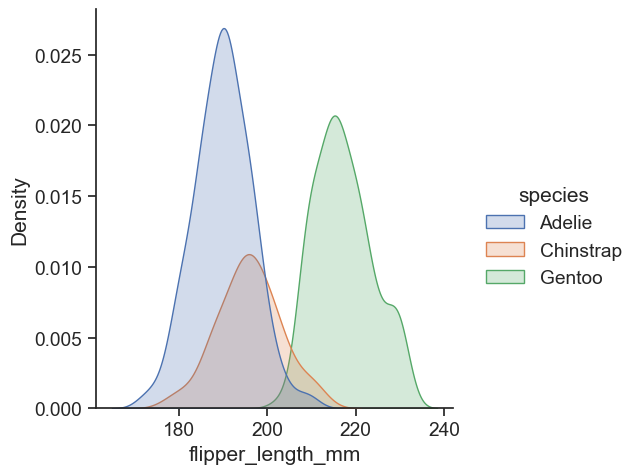

In [42]:
# Conditioning on other variables
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

## Empirical cumulative distributions
- “empirical cumulative distribution function” (ECDF). 
- This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value.
-  x-axis represents the sorted values of the variable, and the y-axis represents the cumulative probability. 
-  It provides a way to assess the distribution of a variable and understand how the values are spread across the range.
-  the cumulative probability at a given value x indicates the proportion of the data that falls below or equal to x.

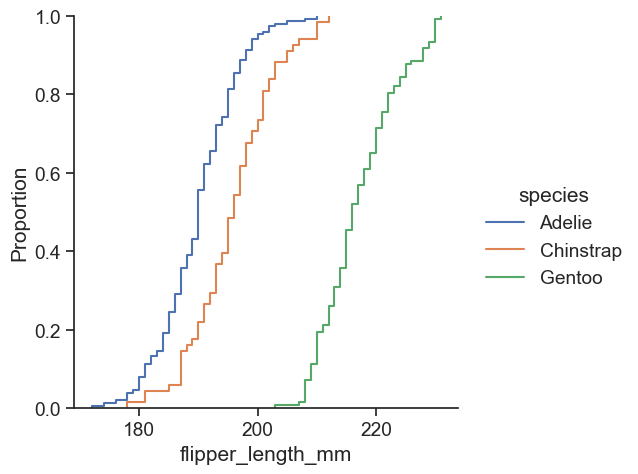

In [43]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

## Visualizing bivariate distributions


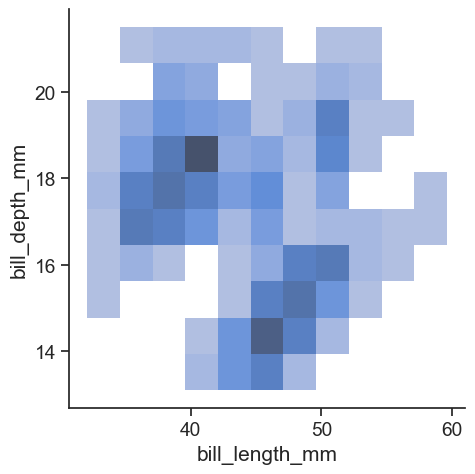

In [44]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

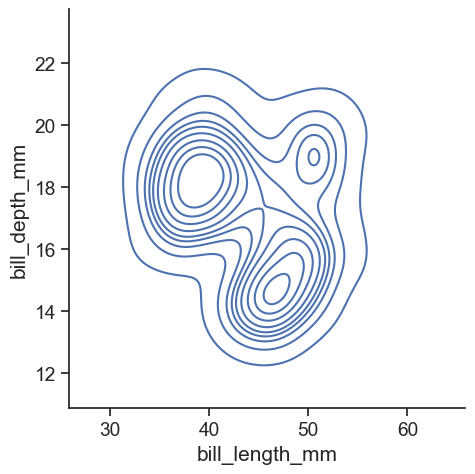

In [45]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

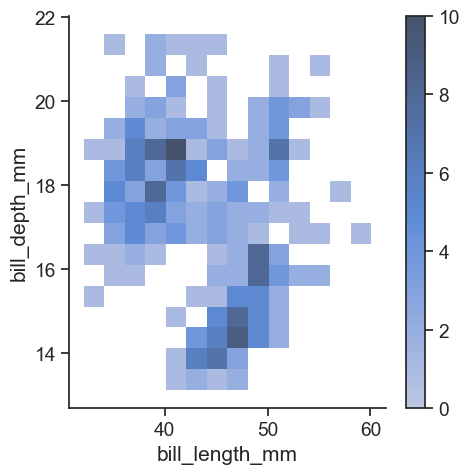

In [46]:
# To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

## Plotting joint and marginal distributions
The first is jointplot(), which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot()

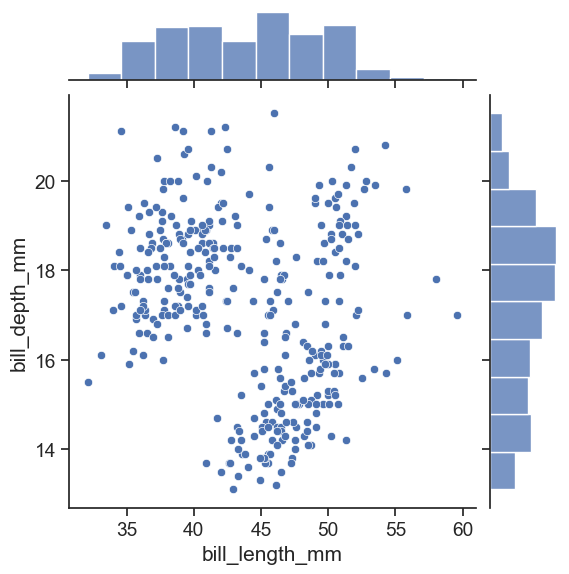

In [54]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

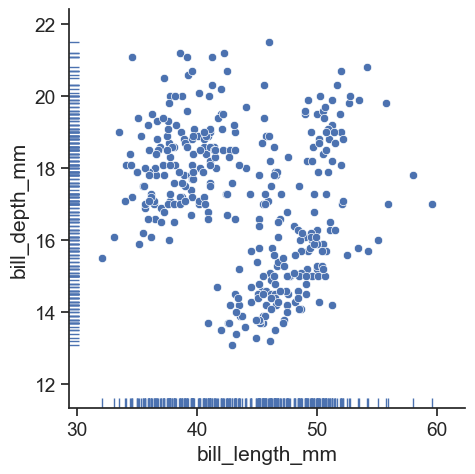

In [55]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

## Plotting many distributions
The pairplot() function offers a similar blend of joint and marginal distributions

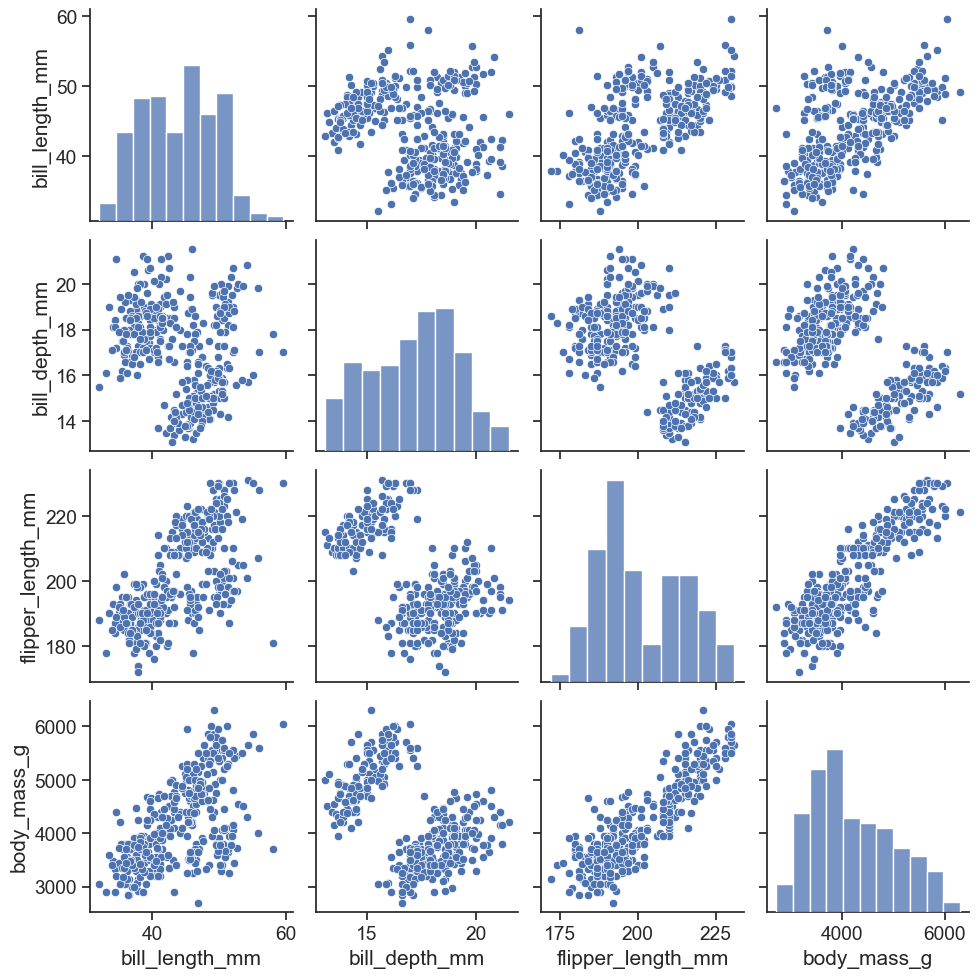

In [56]:
sns.pairplot(penguins)

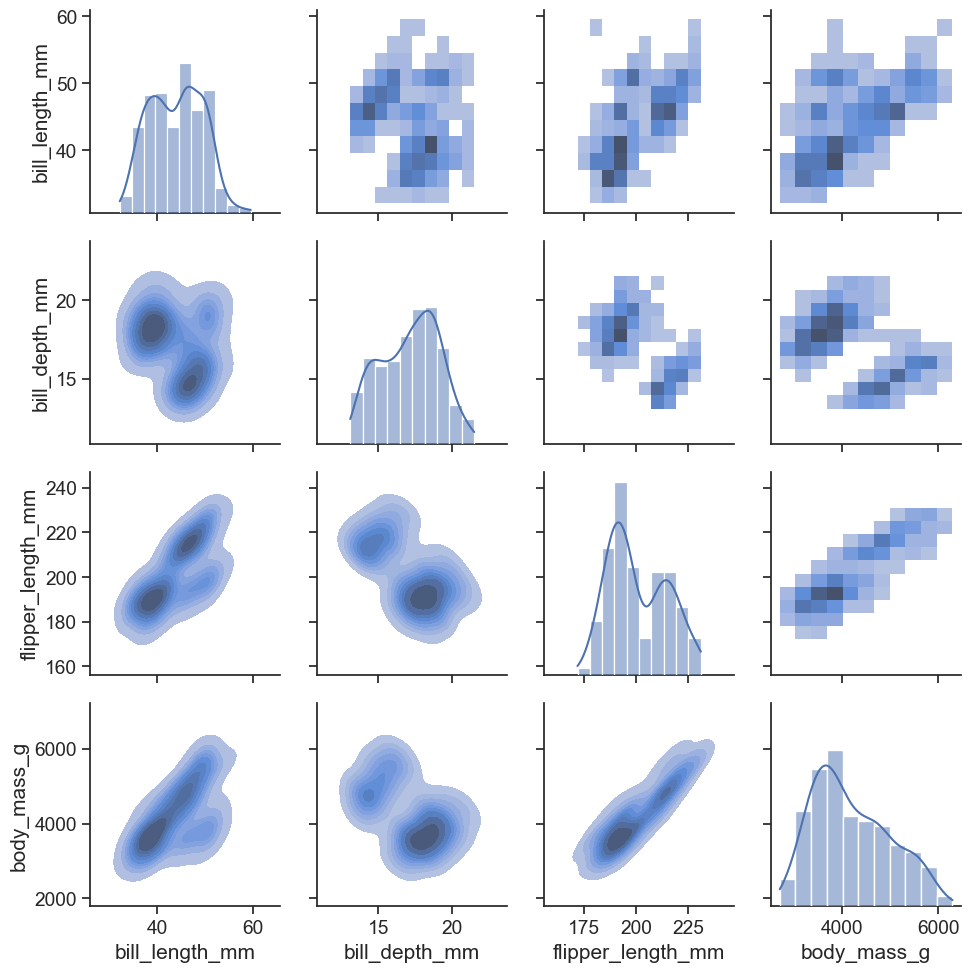

In [57]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Visualizing categorical data

Categorical scatterplots
- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:
- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:
- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")


### Categorical scatterplots

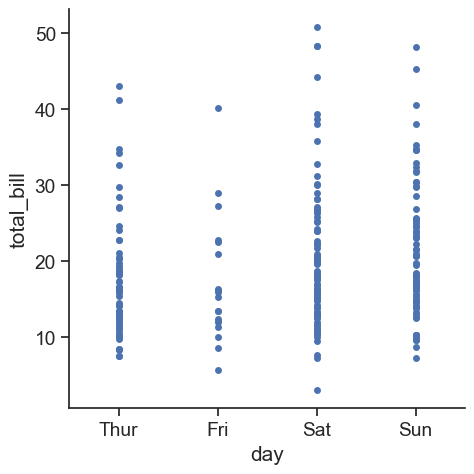

In [58]:
# default ; strip plot
# The jitter parameter controls the magnitude of jitter or disables it altogether:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

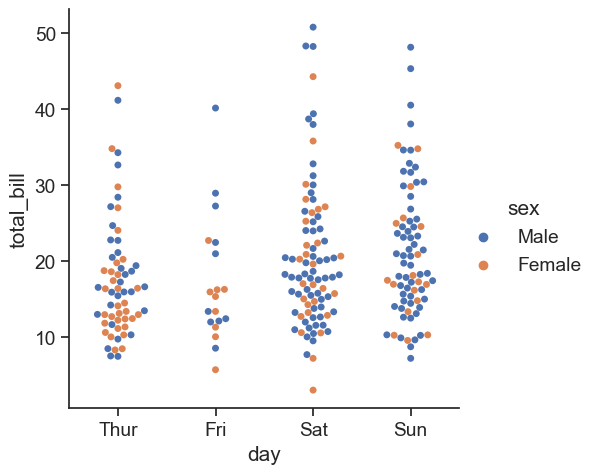

In [60]:
# Swarm plot
#  adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

## Comparing distributions

# Boxplots
>  This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

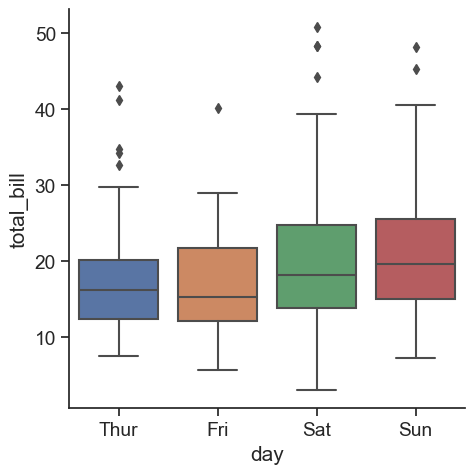

In [61]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

related function, `boxenplot()`, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

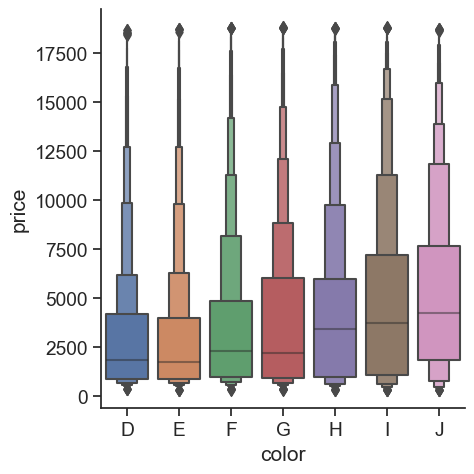

In [64]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

## Violinplots
> combines a boxplot with the kernel density estimation procedure

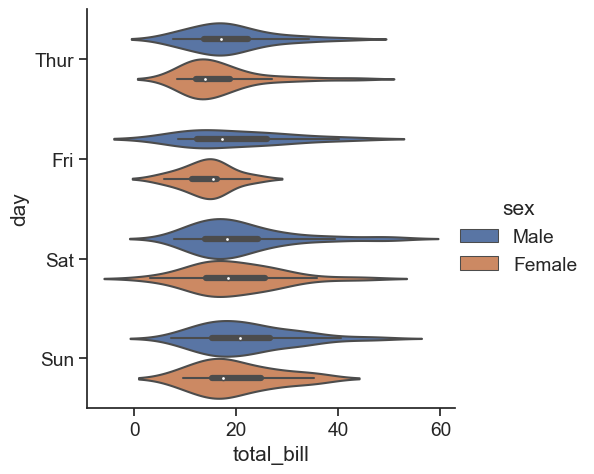

In [65]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

It can also be useful to combine `swarmplot()` or `stripplot()` with a `box plot` or `violin plot` to show each observation along with a summary of the distribution

<AxesSubplot: xlabel='day', ylabel='total_bill'>

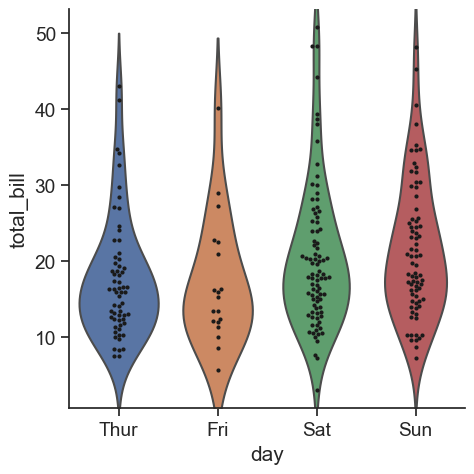

In [66]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

# Estimating central tendency

### Bar plots

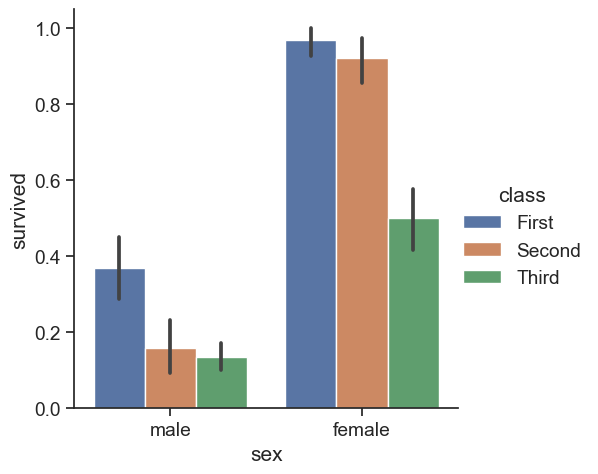

In [67]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

The default error bars show 95% confidence intervals, but (starting in v0.12), it is possible to select from a number of other representations

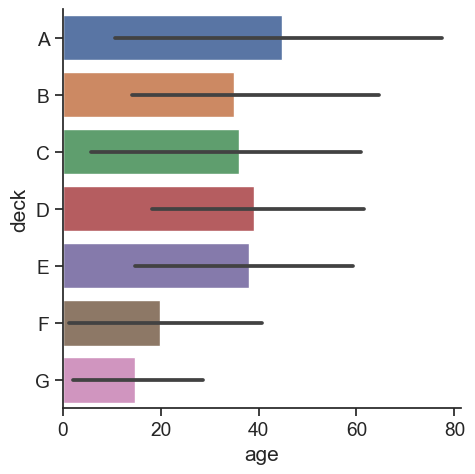

In [68]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

### Point plots
> This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. 

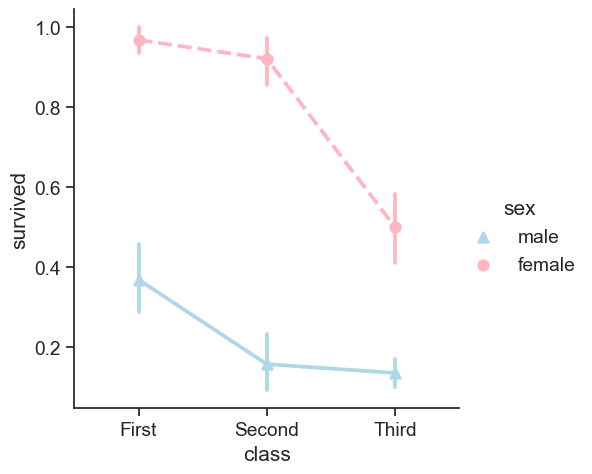

In [71]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "lightblue", "female": "lightpink"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)


# functions for drawing linear regression models
> The two functions that can be used to visualize a linear fit are regplot() and lmplot().

> In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

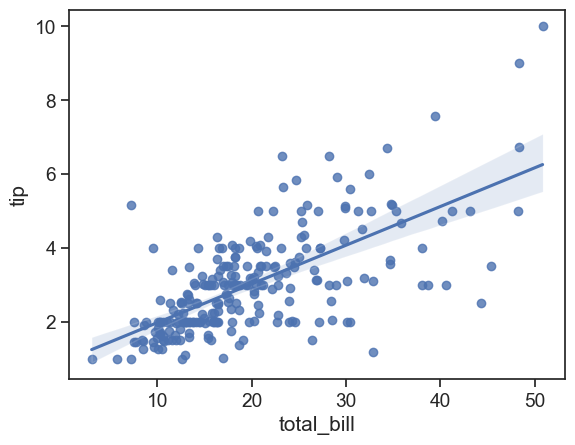

In [72]:
tips = sns.load_dataset("tips")
#  regplot() is an axes-level function
sns.regplot(x="total_bill", y="tip", data=tips);

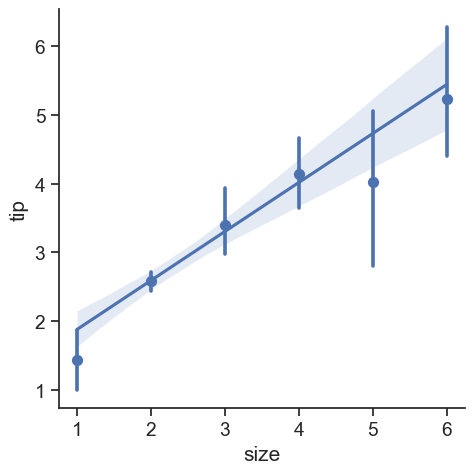

In [74]:
# lmplot() is a figure-level function
import numpy as np
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);